# 🚀 XGBoost Step-by-Step with Library

This notebook demonstrates how to train an XGBoost model on a small custom dataset using the `xgboost` library. It mirrors the manual steps but leverages XGBoost’s internal mechanisms.

In [1]:
# ✅ Install and import libraries
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [10]:
# 📊 Step 1: Prepare the Dataset
data = pd.DataFrame({
    'Age': [25, 45, 35, 22],
    'Salary': [50, 80, 60, 45],
    'EduLevel': [1, 2, 1, 0],
    'Gender': [0, 1, 0, 1],
    'CreditScore': [700, 780, 720, 680],
    'Y': [0, 1, 1, 0]
})
X = data.drop(columns='Y')
y = data['Y']

In [11]:
# 🌿 Step 2: Train an XGBoost Model
dtrain = xgb.DMatrix(X, label=y)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 1,  # only 1 split per tree for step-by-step observation
    'lambda': 1,
    'verbosity': 1
}
bst = xgb.train(params, dtrain, num_boost_round=1)
bst.dump_model('model.txt')

In [13]:
# 📈 Step 3: View Predictions
preds = bst.predict(dtrain)
pred_df = X.copy()
pred_df['Actual'] = y
pred_df['Predicted_Prob'] = preds
pred_df

,Age,Salary,EduLevel,Gender,CreditScore,Actual,Predicted_Prob
0,25,50,1,0,700,0,0.5
1,45,80,2,1,780,1,0.5
2,35,60,1,0,720,1,0.5
3,22,45,0,1,680,0,0.5


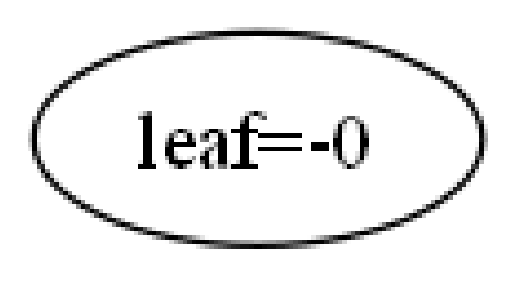

In [14]:
# 🧠 Optional: View Tree
xgb.plot_tree(bst, num_trees=0)
import matplotlib.pyplot as plt
plt.show()